# Problem Statement

As a part of the recruitment process, we ask all candidates to solve an open-ended problem to give us an opportunity to better understand their approach to problem solving, technical skills etc. Please spend up to a week on the following problem. We should also mention that we encourage the candidate to communicate with us throughout the process, giving us updates and asking questions as necessary. 

Healthcare Dataset Challenge: The task is to **analyze the clinical and financial data of patients hospitalized for a certain condition**. It is attached with this email. Some variable names and patient_id's have been anonymized in this dataset. You are required to **join the data given in different tables**, and **find insights about the drivers of cost of care**. Please see attached documents for datasets. 

For this challenge, you will be given 1-1.5 weeks, at the end of which we expect you to **share your code (github repository) and a document/slides describing your approach and results, insights etc**. This position requires **strong communication and visualization skills**. Your **slide design, narrative and content as well your presentation will be judged not only for technical but communication skills as well**. If you have any question, please feel free to contact Abhijit Ghosh (abhijit.ghosh@holmusk.com).


- analyze the clinical and financial data of patients hospitalized for a certain condition
- join the data given in different tables
- find insights about the drivers of cost of care

# 1. Import libraries and dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('fivethirtyeight')


## Import dataset from `.csv`

In [2]:
df = pd.read_csv('df_cleaned')
df.drop(columns='_merge', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   amount              3400 non-null   float64
 3   date_of_discharge   3400 non-null   object 
 4   date_of_birth       3400 non-null   object 
 5   weight              3400 non-null   float64
 6   height              3400 non-null   float64
 7   gender              3400 non-null   object 
 8   race                3400 non-null   object 
 9   resident_status     3400 non-null   object 
 10  age                 3400 non-null   float64
 11  duration(days)      3400 non-null   int64  
 12  medical_history_1   3400 non-null   int64  
 13  medical_history_2   3167 non-null   float64
 14  medical_history_3   3400 non-null   int64  
 15  medical_history_4   3400 non-null   int64  
 16  medica

# 2. Data Cleaning

In [3]:
# # convert null value to "Missing Value":
# df.fillna("Missing Value", inplace=True)

### Change data types

In [4]:
# convert datetime columns to datetime format
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['date_of_discharge'] = pd.to_datetime(df['date_of_discharge'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [5]:
# convert each id to a number from 0-3000 for easier identification
patient_num = list(range(0,len(set(df.patient_id))))
patient_id_list = list(set(df.patient_id))
# assigning each id to an integer
patient_dict = {}
for i in range(len(patient_num)):
    patient_dict[patient_id_list[i]] = patient_num[i]

# replacing id to integer in dataframe
df['patient_id'].replace(patient_dict, inplace=True)

# convert patient_id column to object
df['patient_id'] = df['patient_id'].astype(object)

### Feature Engineering

In [6]:
# create month and year from date_of_admission
df['year'] = df['date_of_admission'].dt.year
df['month'] = df['date_of_admission'].dt.month
# Feature Engineering: creating BMI column based on height and weight
df['BMI'] = df['weight']/((df['height']/100)**2)

df['medical_sum'] = df[['medical_history_1','medical_history_2','medical_history_3',
                       'medical_history_4','medical_history_5','medical_history_6',
                       'medical_history_7']].sum(axis=1)
df['preop_medication_sum'] = df[['preop_medication_1','preop_medication_2','preop_medication_3',
                       'preop_medication_4','preop_medication_5','preop_medication_6']].sum(axis=1)
df['symptom_sum'] = df[['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']].sum(axis=1)

# 3. Data Analysis

Our analysis shall follow the following approach:

1. For each categorical columns (gender, race, resident_status):
- Analyse against numerical columns
- Goal: identify Financial and Clinical analysis of patient data

2. Analyse columns w.r.t. cost:
- Goal : identify driver of cost



In [7]:
categorical_columns = ['gender', 'race','resident_status','year','month']
numerical_columns = ['weight','height','BMI','age','duration(days)','amount']
total_columns = categorical_columns + numerical_columns

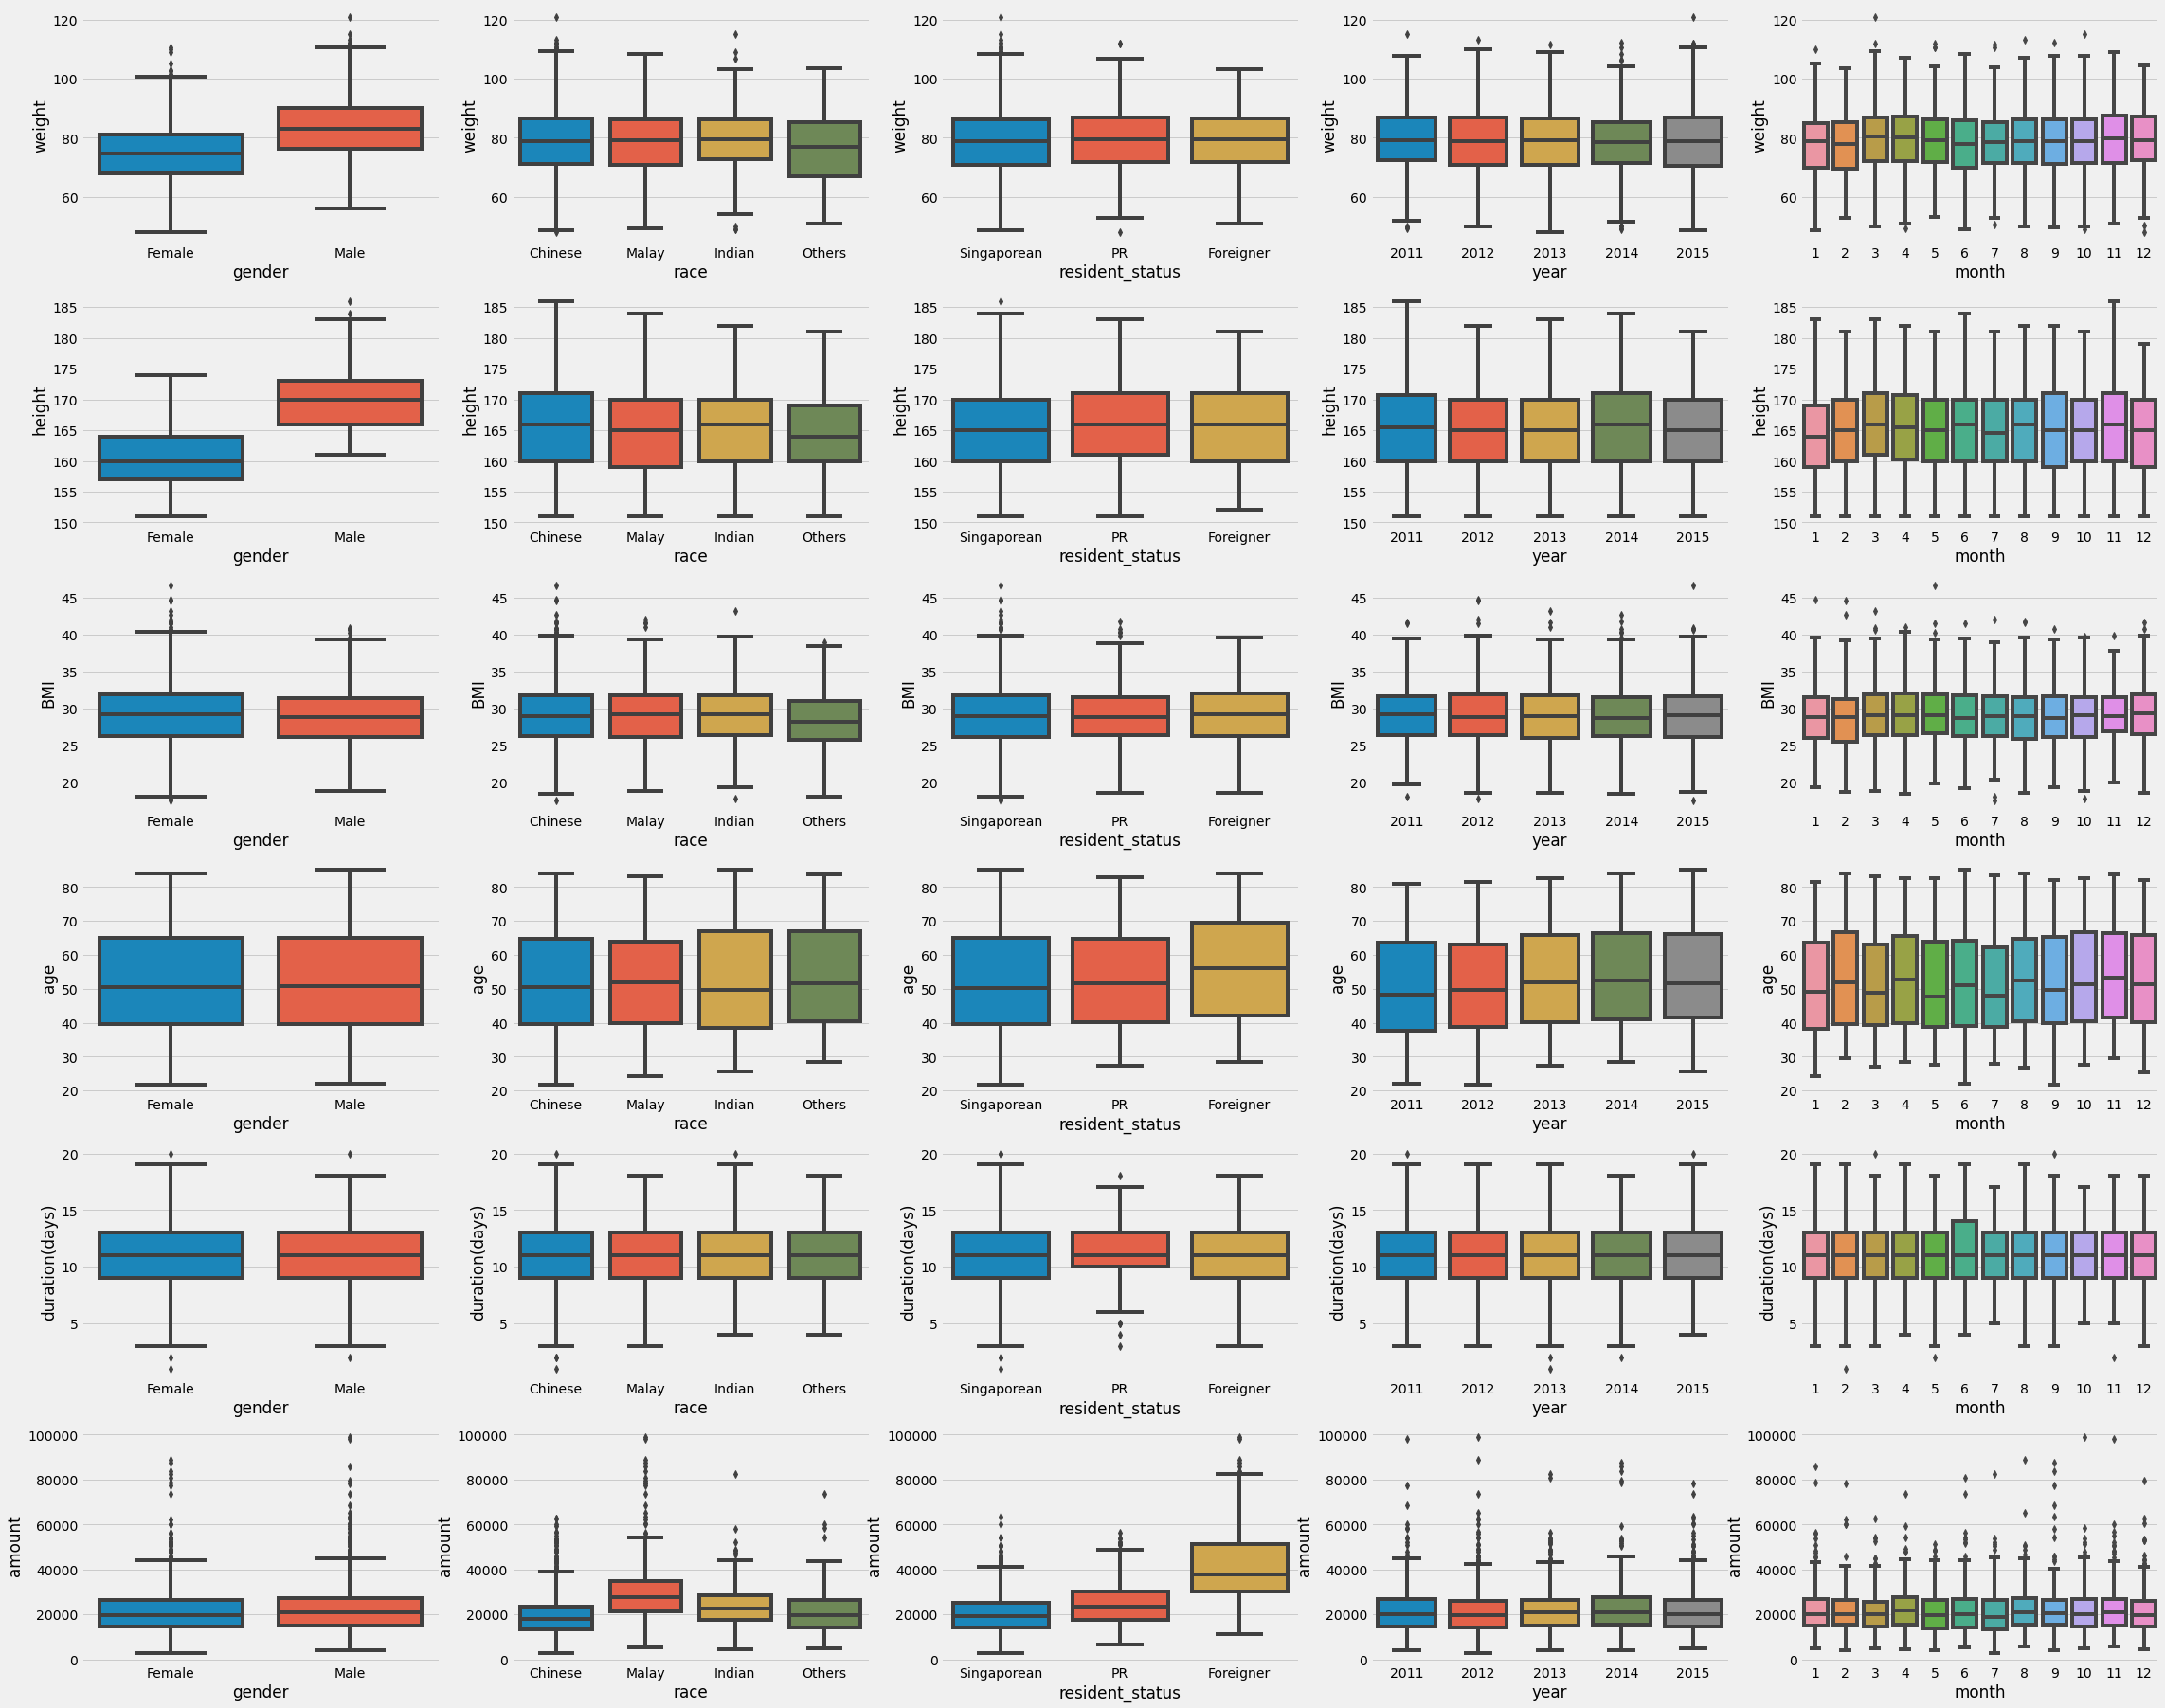

In [8]:
total_columns = categorical_columns + numerical_columns
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=len(categorical_columns),
                        figsize=(7*len(categorical_columns),5*len(numerical_columns)))
num_col = 0
cat_col = 0
for num_col in range(len(numerical_columns)):
    for cat_col in range(len(categorical_columns)):
        ax = sns.boxplot(data=df, x=df[categorical_columns[cat_col]], y=df[numerical_columns[num_col]],
                    ax=axs[num_col,cat_col])

Exploratory Data Analysis of categorical columns against numerical columns (excluding medical records data)
- Looking at `resident_status`: Foreigners age is older than Singaporean/PR. It also cost them about twice as much as Singaporean/PR. This shows that Foreigners tend to come to Singapore for medical help later in their age, possibly as they need to more time to accummulate enough wealth, since it is more expensive for them. 
- Looking at `race`:, Malays seem to bear higher cost and with more variance in their outliers too. This could possibly be due to more complex issues (e.g multiple health conditions) they are facing or that it may be due to other underlying problem related to cost such as lack of insurance that leads to higher cost.


### Creating new columns that sums `medical_history`, `preop_medication`, `symptom` 

In [9]:
df['medical_sum'] = df[['medical_history_1','medical_history_2','medical_history_3',
                       'medical_history_4','medical_history_5','medical_history_6',
                       'medical_history_7']].sum(axis=1)
df['preop_medication_sum'] = df[['preop_medication_1','preop_medication_2','preop_medication_3',
                       'preop_medication_4','preop_medication_5','preop_medication_6']].sum(axis=1)
df['symptom_sum'] = df[['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']].sum(axis=1)

As we have alluded to earlier, higher cost may be due to more complex issues. We feature engineer the above 3 columns to use as a proxy for more complex issues to try to find relationships with cost.

The higher the medical_sum and symptom_sum, the more expensive it is. To see if the higher cost borned by malays is due to higher medical_sum / symptom_sum we look at the distribution by race.


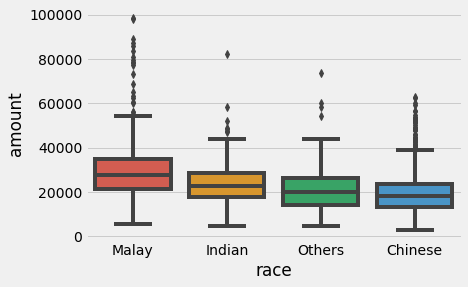

In [10]:
color_race = {'Malay': '#E74C3C',
             'Chinese': '#3498DB',
             'Indian': '#F39C12',
             "Others": '#28B463'}

sns.boxplot(data=df, x='race', y='amount',palette=color_race, order=df.groupby('race').median()['amount'].sort_values(ascending=False).index);

### Next, we want to analyse how cost is affected by the number of health conditions each patient has
- we use the 3 feature engineered columns of `medical_sum`, `symptom_sum`, `preop_medication_sum` to check if cost is affected by these
- from the barplot below, there is a distinct relationship in that as `medical_sum` and `sumptom_sum` inreases, the cost also increases, which is justified since more complex health conditions usually cost more to treat.

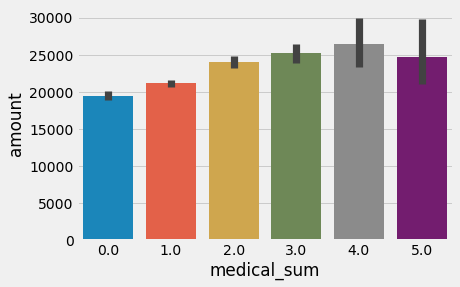

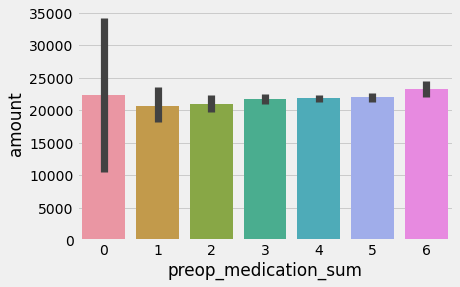

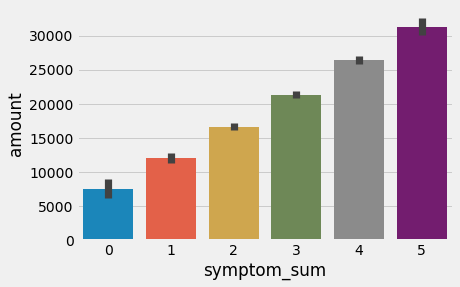

In [11]:
sns.barplot(data=df, x='medical_sum', y='amount');
plt.show()
sns.barplot(data=df, x='preop_medication_sum', y='amount');
plt.show()
sns.barplot(data=df, x='symptom_sum', y='amount');
plt.show()

In [34]:
df.head()

patient_id date_of_admission        amount date_of_discharge date_of_birth  \
0       2665        2013-06-04  21040.661990        2013-06-15    1956-04-02   
1       2989        2012-12-24  28007.636468        2013-01-01    1950-06-06   
2        153        2013-05-05  30053.620971        2013-05-15    1938-09-12   
3       1451        2015-11-28  14049.042774        2015-12-07    1963-10-07   
4       2137        2011-04-24   4676.066179        2011-05-04    1976-08-07   

   weight  height  gender     race resident_status        age  duration(days)  \
0    70.7   165.0  Female  Chinese     Singaporean  57.166667              11   
1    81.3   161.0    Male    Malay     Singaporean  62.500000               8   
2    83.1   170.0    Male  Chinese              PR  74.666667              10   
3    99.6   178.0    Male  Chinese     Singaporean  52.083333               9   
4    69.3   162.0  Female   Indian     Singaporean  34.666667              10   

   medical_history_1  medical_history_2  medical_history_3  medical_history_4  \
0                  0                0.0                  0                  0   
1                  0                0.0                  0                  0   
2                  0                1.0                  0                  0   
3                  0                0.0                  0                  0   
4                  0                1.0                  0                  0   

   medical_history_5  medical_history_6  medical_history_7  \
0                0.0                  0                  1   
1                0.0                  0                  0   
2                1.0                  0                  0   
3                0.0                  0                  0   
4                0.0                  0                  1   

   preop_medication_1  preop_medication_2  preop_medication_3  \
0                   0                   0                   1   
1                   1                   1                   1   
2                   1                   1                   1   
3                   1                   1                   1   
4                   0                   0                   1   

   preop_medication_4  preop_medication_5  preop_medication_6  symptom_1  \
0                   1                   1                   1          1   
1                   1                   1                   0          1   
2                   1                   1                   1          0   
3                   1                   1                   1          1   
4                   0                   1                   0          0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          1          1          1          13.9          26.9   
1          1          1          1          0          16.4          33.6   
2          0          1          1          1          16.7          30.1   
3          1          0          1          0          16.0          26.7   
4          0          0          0          0          16.3          27.4   

   lab_result_3  year  month        BMI  medical_sum  preop_medication_sum  \
0          95.0  2013      6  25.968779          1.0                     4   
1          96.0  2012     12  31.364531          0.0                     5   
2         107.0  2013      5  28.754325          2.0                     6   
3         121.0  2015     11  31.435425          0.0                     6   
4          86.0  2011      4  26.406036          2.0                     2   

   symptom_sum  
0            4  
1            4  
2            3  
3            3  
4            0

In [43]:
np.round(temp[['medical_sum','preop_medication_sum','symptom_sum']],2)

medical_sum  preop_medication_sum  symptom_sum
race                                                   
Chinese         1.21                  3.99         3.07
Indian          1.25                  4.06         3.17
Malay           1.22                  4.03         3.07
Others          1.17                  3.94         3.07

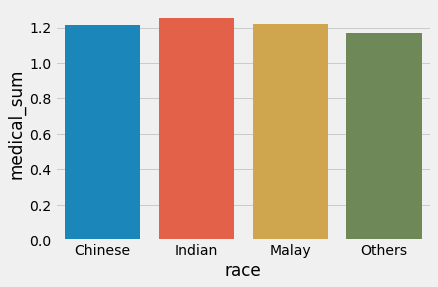

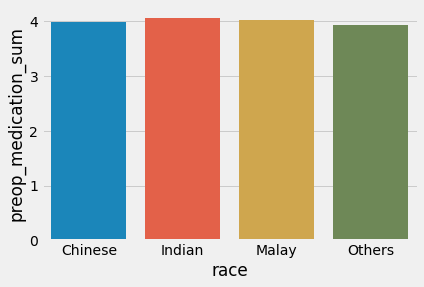

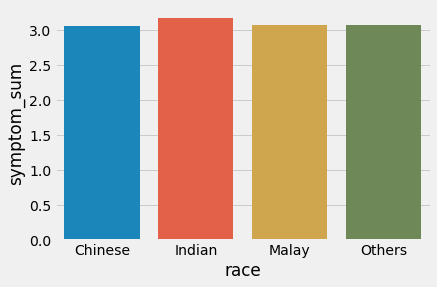

In [40]:
temp = df.groupby('race').mean()

for i in ['medical_sum','preop_medication_sum','symptom_sum']:
    sns.barplot(data=temp, x=temp.index, y=i)
    plt.show()


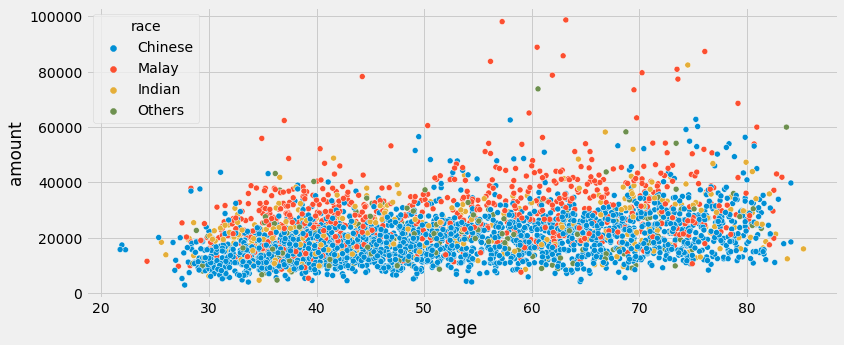

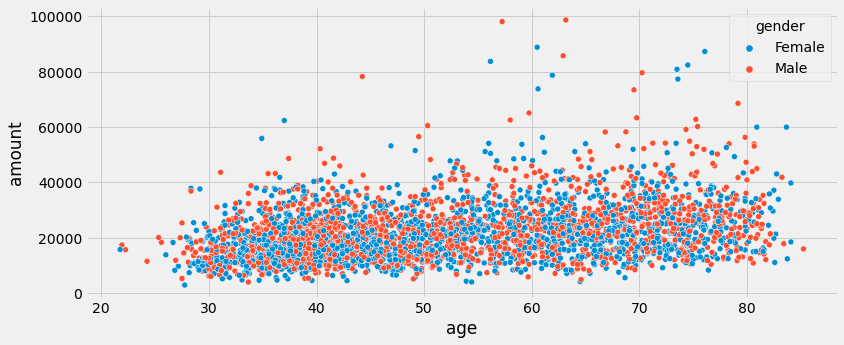

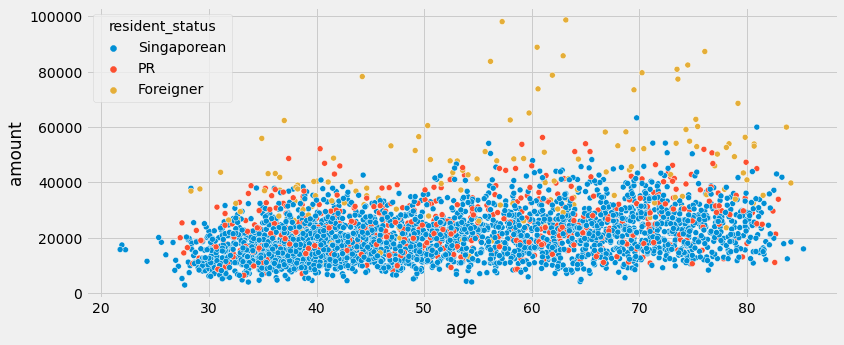

In [12]:
for i in ['race','gender','resident_status']:
    plt.figure(figsize=(12,5))
    sns.scatterplot(data =df, x = df['age'], y = df['amount'], hue=i);
    plt.show();

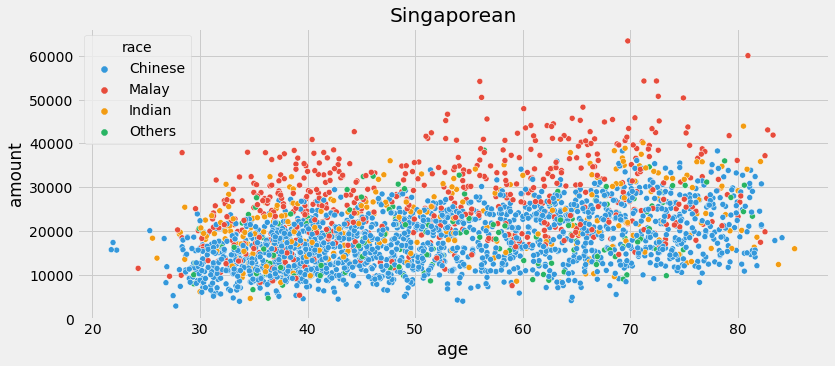

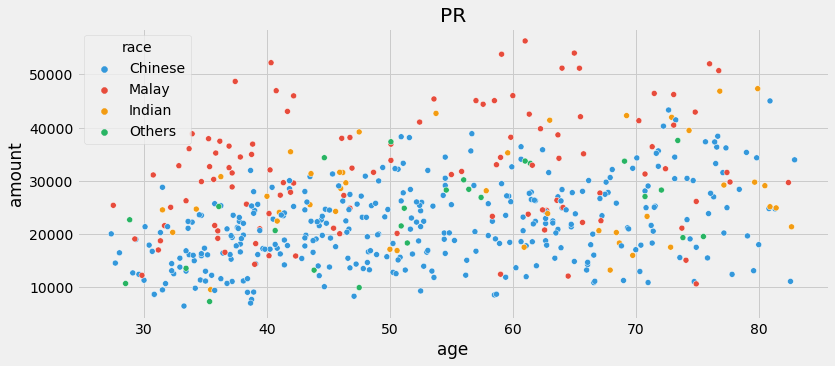

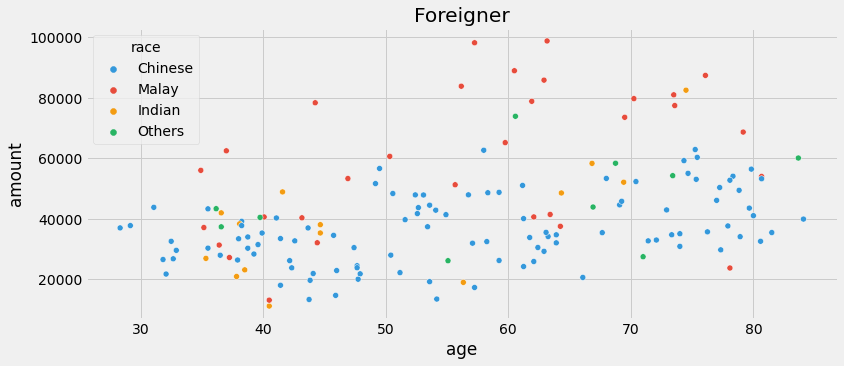

In [13]:
for status in set(df['resident_status']):
    temp = df[df['resident_status']==status]
    plt.figure(figsize=(12,5))
    sns.scatterplot(data =temp, x = 'age', y = 'amount', hue='race',hue_order=['Chinese','Malay','Indian','Others'], palette=color_race);
    plt.title(status)
    plt.show(); 

### analysing cost across time
- overall
- based on resident_status, gender, race
- based on different months

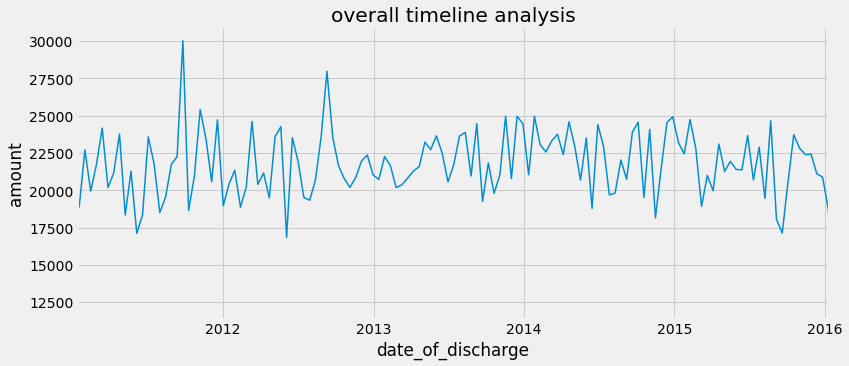

In [14]:
temp = df.groupby(pd.Grouper(key='date_of_discharge',freq = '2W')).mean().reset_index()
temp
plt.figure(figsize=(12,5))
sns.lineplot(data=temp, x='date_of_discharge', y='amount', linewidth=1.5)
ser = df['date_of_discharge'].sort_values().reset_index(drop=True)
plt.xlim(ser[0],ser[len(ser)-1]);
plt.title(f'overall timeline analysis');


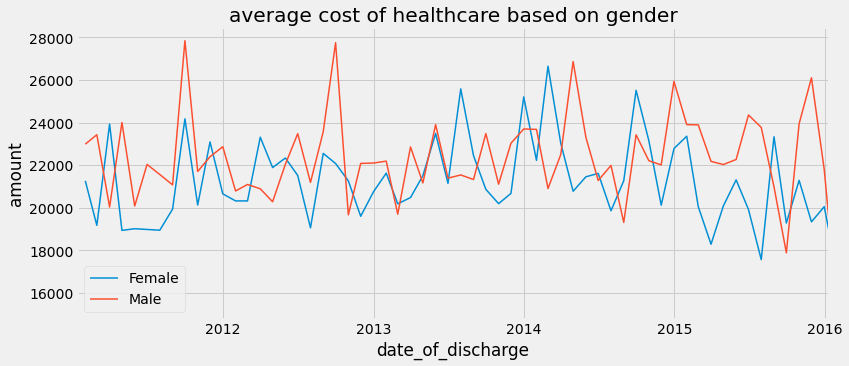

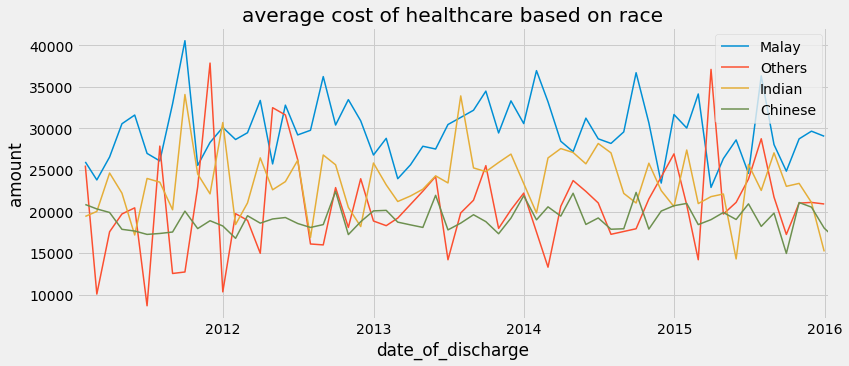

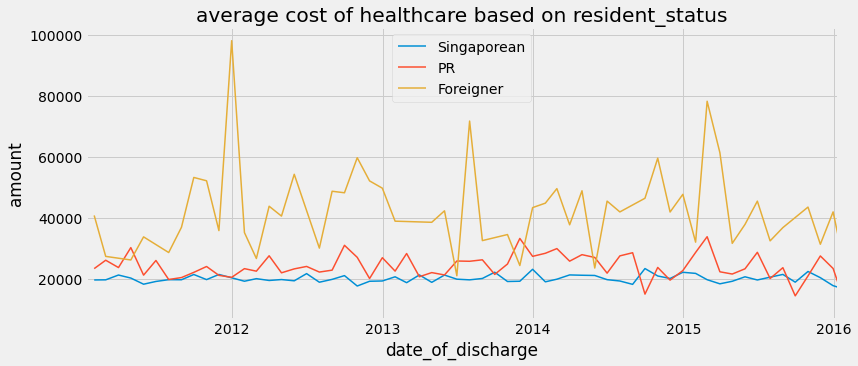

In [15]:
temp = df.sort_values(by='date_of_discharge')
temp1 = temp.groupby([pd.Grouper(key='date_of_discharge',freq = '1M'),'resident_status']).mean().reset_index()

for col in ['gender', 'race', 'resident_status']:
    temp1 = df.groupby([pd.Grouper(key='date_of_discharge',freq = '1M'),col]).mean().reset_index()
    
    plt.figure(figsize=(12,5))
    for cat in set(temp1[col]):
        temp2 = temp1[temp1[col]==cat]
        sns.lineplot(data=temp2, x='date_of_discharge', y='amount', linewidth=1.5)
        plt.legend(set(temp1[col]))
        plt.title(f'average cost of healthcare based on {col}')
        ser = df['date_of_discharge'].sort_values().reset_index(drop=True)
        plt.xlim(ser[0],ser[len(ser)-1]);


- Based on `race`, Malays seem to pay more on average for health conditions, suggesting that their treatments may be more expensive, possibly due to more complex health conditions.
- Based on `resident_status`, the average cost increase from Singaporean to PR to Foreigners. This is largely due to the government subsidies given to Singaporeas and PR. Furthermore, Singapore is well known to be a medical hub and foreigners frequently visit Singapore for complex medical treatments and therefore high cost.

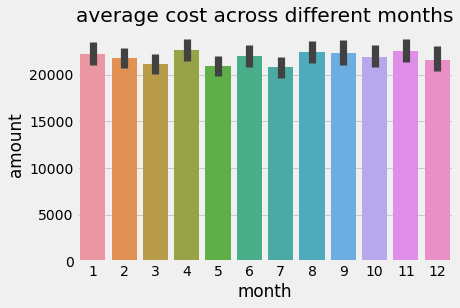

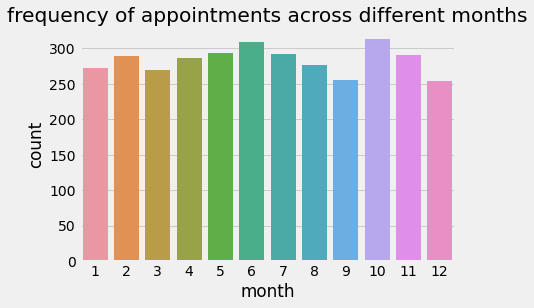

In [16]:
sns.barplot(data=df, y='amount',x='month');
plt.title('average cost across different months')
plt.show()
sns.countplot(data=df,x='month');
plt.title('frequency of appointments across different months')
plt.show()

### analyse susceptibility of different groups to certain conditions
- gender, race, resident_status

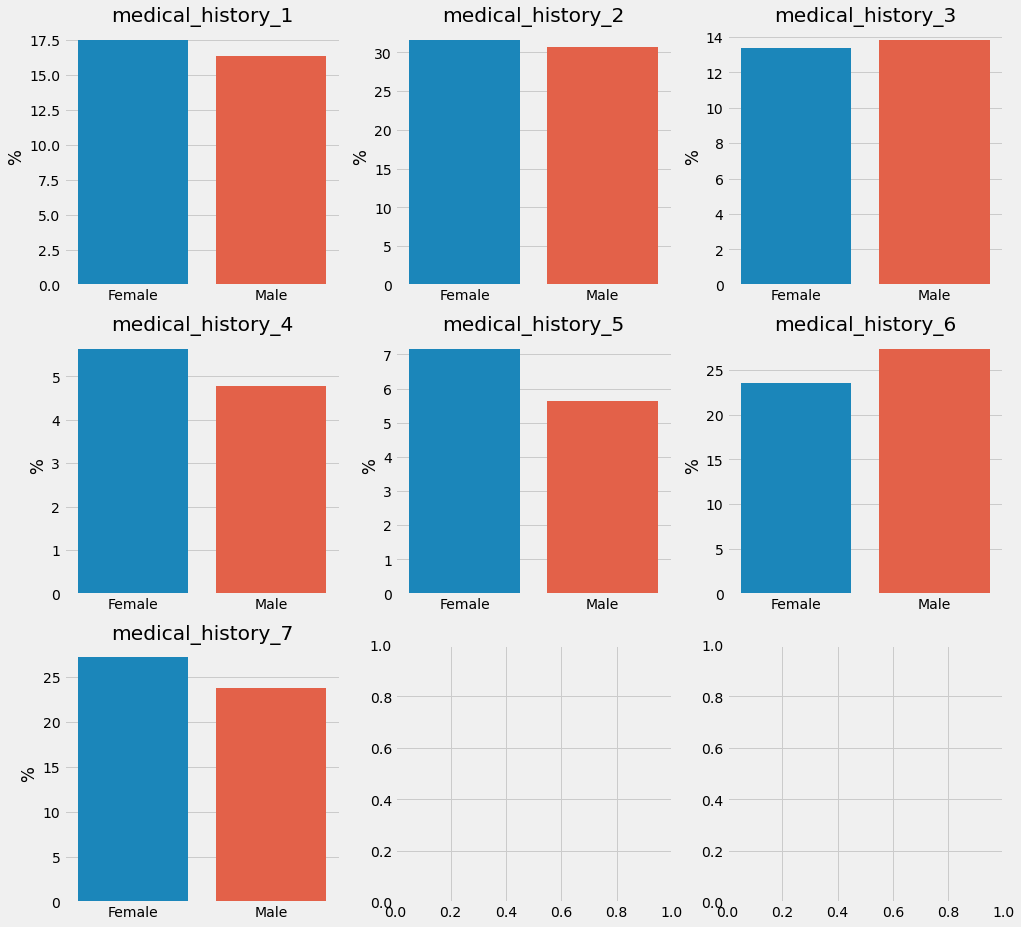

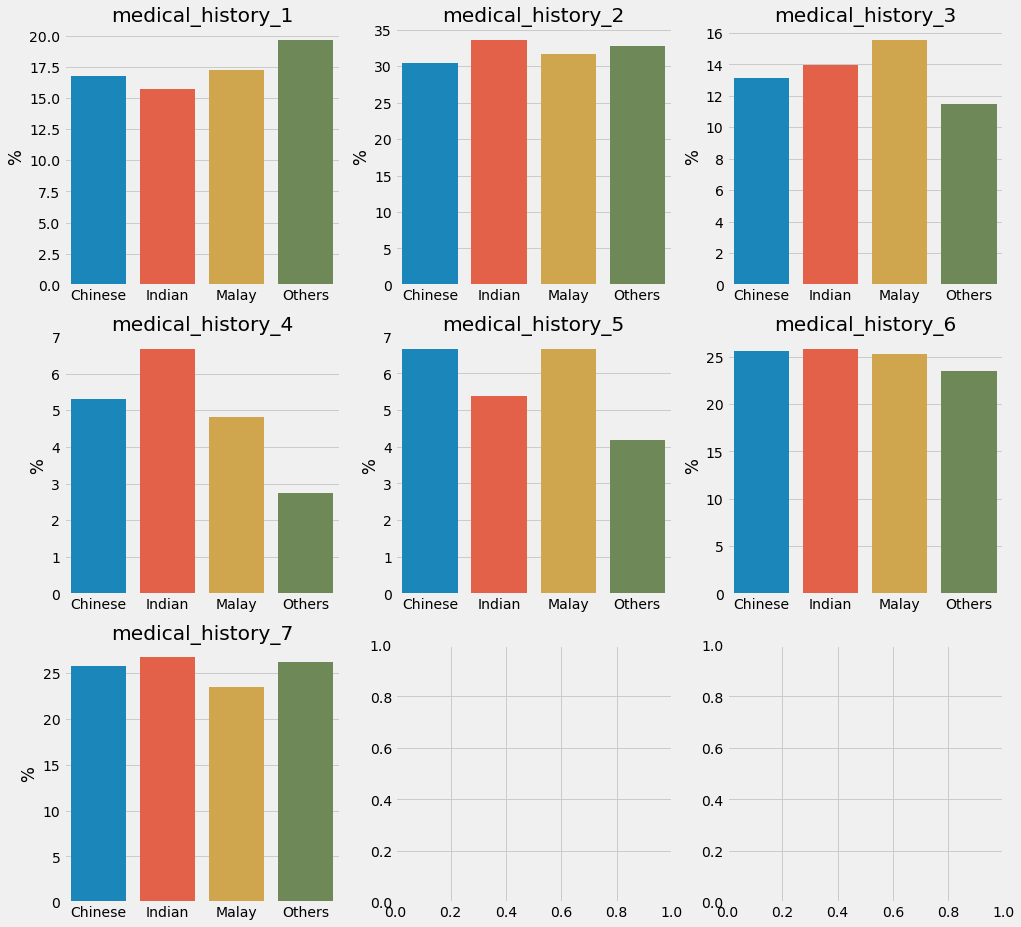

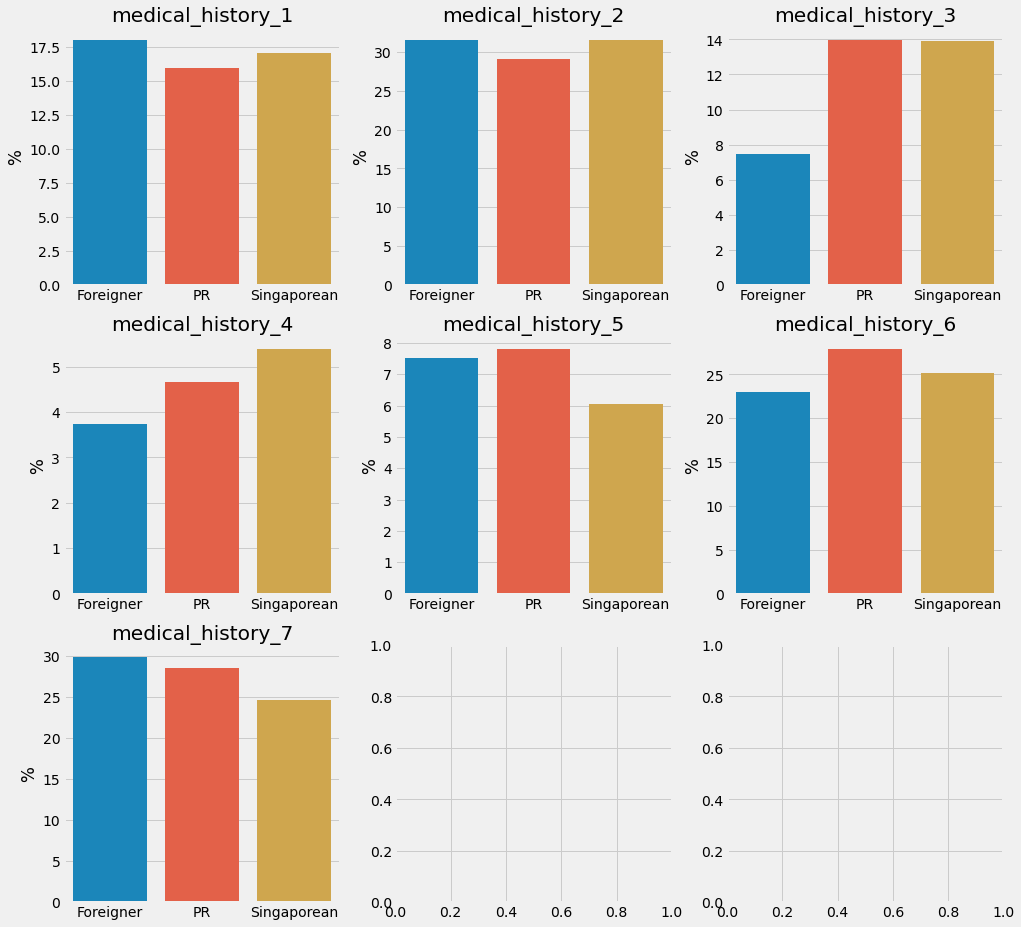

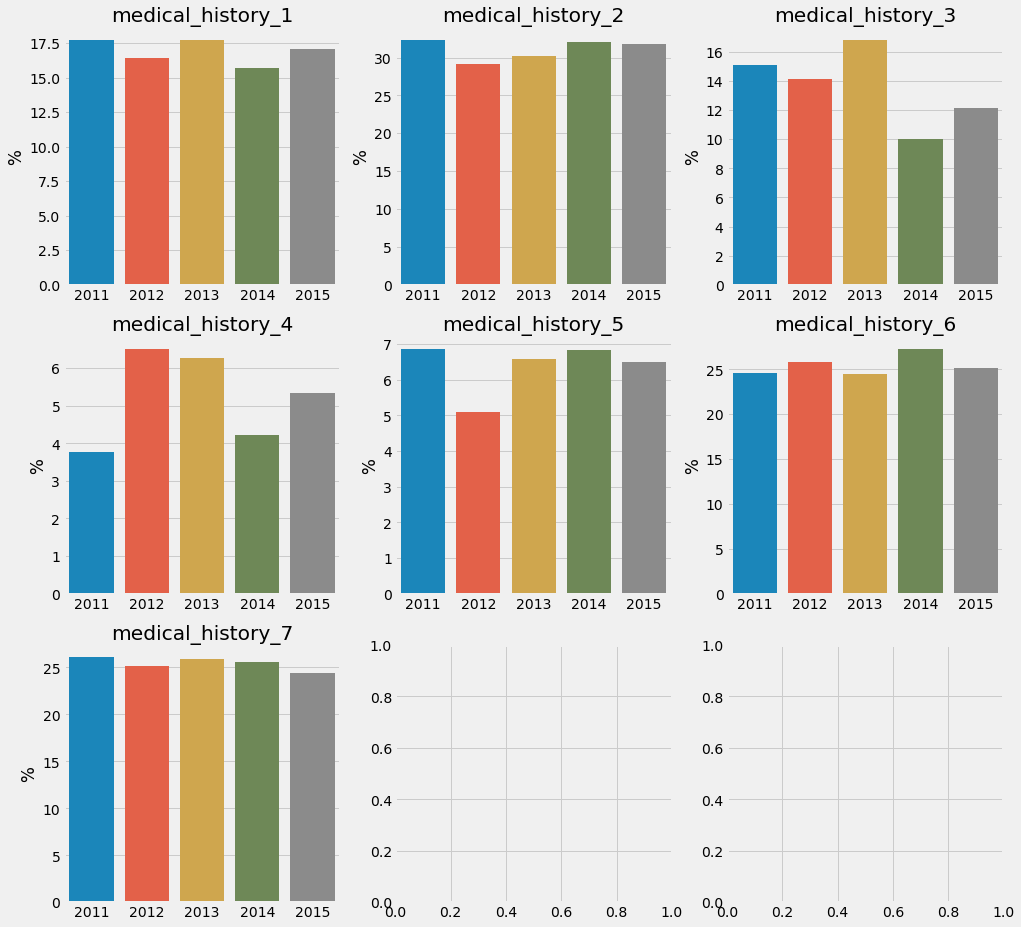

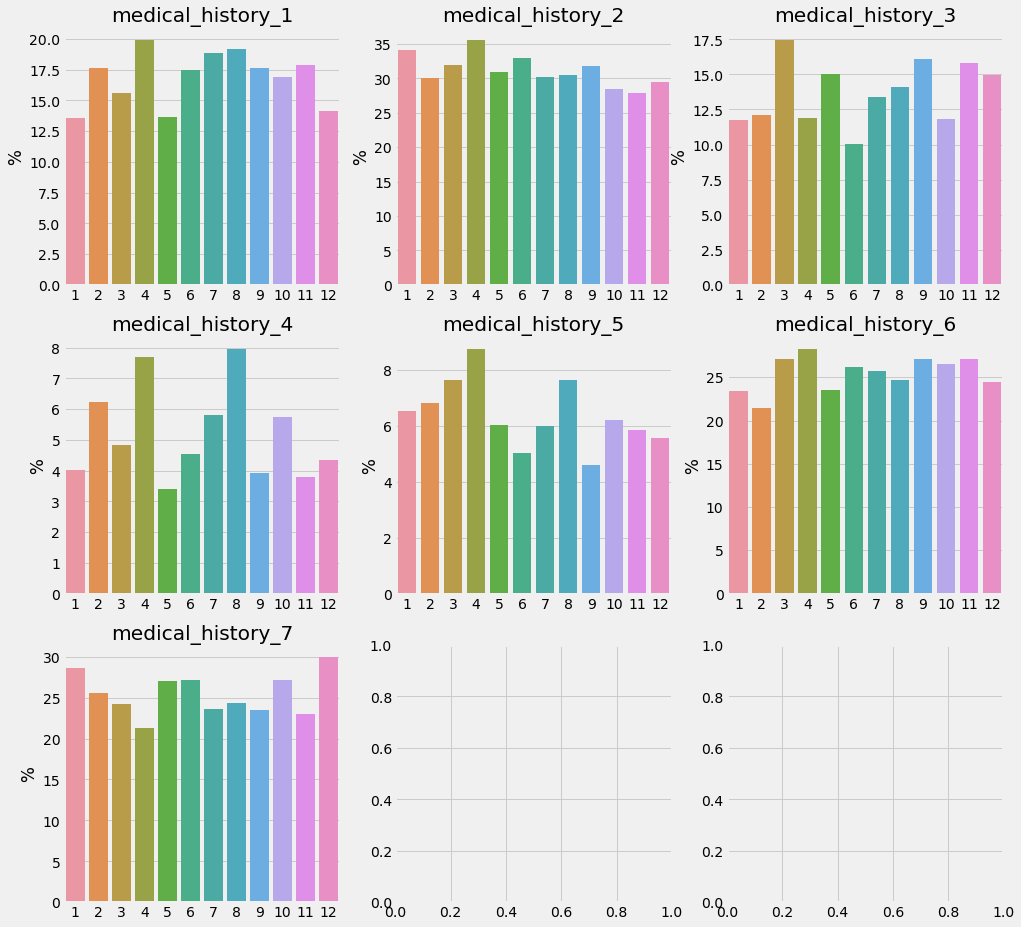

In [17]:
# fig, axs = plt.subplots(nrows=len(medical_history), ncols=len(set(df[cat])), figsize=(15,5*len(medical_history)))

def plot_bars(cat):
    row_idx, col_idx, plots = 0, 0, 0

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,5*3))
    temp = df.groupby(cat).mean().reset_index()

    for med in ['medical_history_1','medical_history_2','medical_history_3','medical_history_4','medical_history_5','medical_history_6','medical_history_7']:

        ax = sns.barplot(data=temp, x=cat, y=temp[med]*100, ax=axs[row_idx,col_idx])
        ax.set_xlabel(None)
        ax.set_ylabel('%')
        ax.set_title(med)

        if col_idx < 2:
            col_idx+=1
        else:
            row_idx+=1
            col_idx=0
        plots+=1
        if plots > 6:
            break
            
            
for cat in categorical_columns: # ['gender', 'race', 'resident_status']
    plot_bars(cat)

### Correlation heatmap

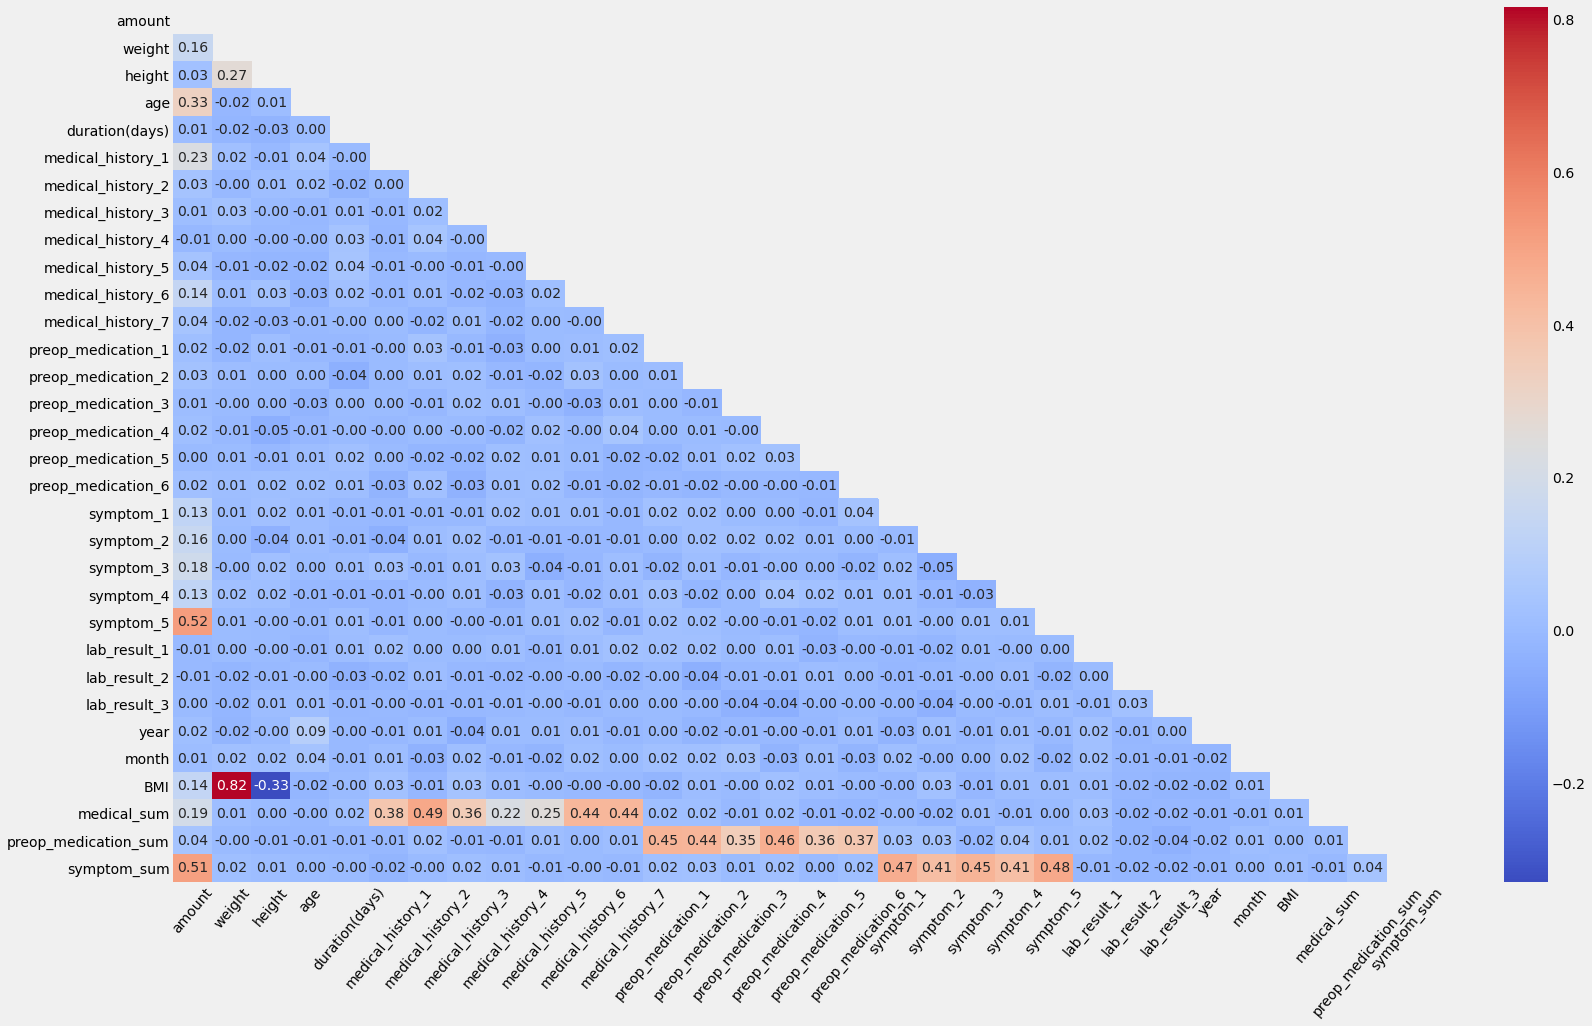

In [18]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='coolwarm',
               mask = np.triu(np.ones_like(df.corr(), dtype=bool)),
);
plt.xticks(rotation=50);

From the heatmap above:
- most columns do not have any notable correlation with each other except:
    - amount vs symptom5: This suggests that symptom5 is a symptom of an illness which may be more costly to treat than the others. 
    - amount vs medical_history1: This suggests that medical_history1 could be a condition that leads to more costly treatment than others.
    - amount vs age: The older the patient is, the more expensive it is. However, this is only a slight positive correlation of 0.33. This is perhaps not entirely aligned with the general view that cost rise with age.

### in depth findings for symptom_5 and medical_history_1

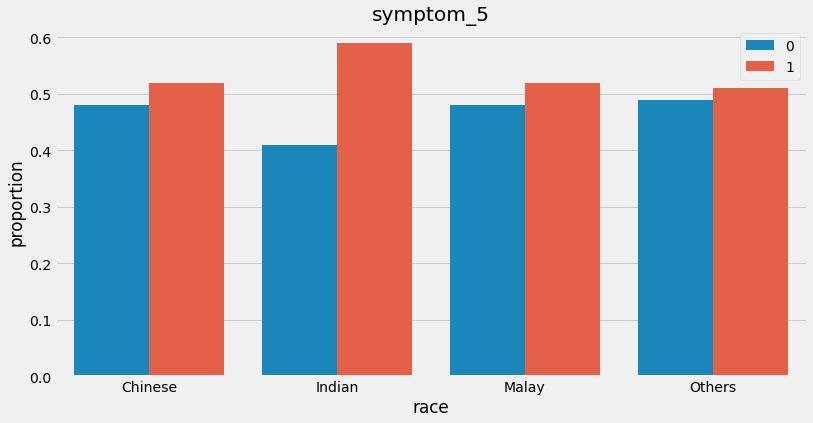

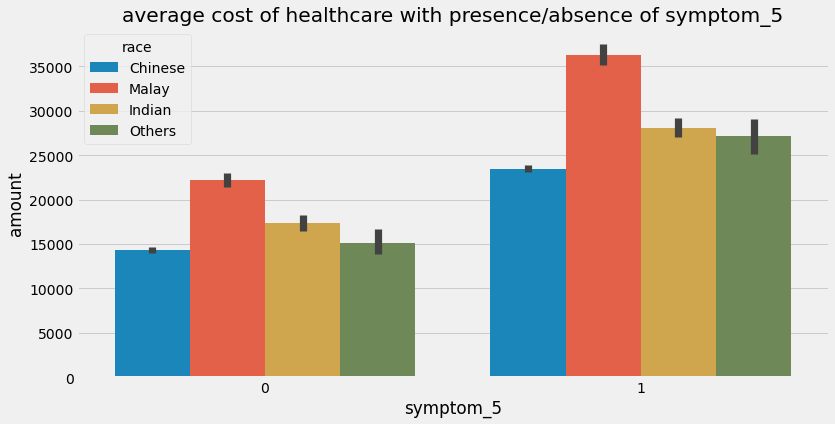

In [19]:
c = df[df['race']=='Chinese'].count()[0]
i = df[df['race']=='Indian'].count()[0]
m = df[df['race']=='Malay'].count()[0]
o = df[df['race']=='Others'].count()[0]
race_dict = {'Chinese':c, 'Malay':m,'Indian':i, 'Others':o}

temp = df.groupby(['race', 'symptom_5']).count().reset_index()
temp2 = temp[['race','symptom_5','amount']]
temp2 = temp2.set_index('race')
for race in set(df['race']):
    temp2.loc[race,'proportion'] = temp2.loc[race,'amount']/race_dict[race]
temp2.columns = ['symptom_5','count','proportion']
temp2['proportion'] = np.round(temp2['proportion'],2)

temp3 = temp2.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = temp3, y='proportion', x='race', hue='symptom_5');
plt.title('symptom_5')
plt.legend();
plt.show();

temp = df[['symptom_5','race','gender','resident_status','amount']]
temp.groupby(['symptom_5','race']).mean()
plt.figure(figsize=(12,6))
sns.barplot(data=temp, x='symptom_5', y='amount', hue='race');
plt.title(f'average cost of healthcare with presence/absence of symptom_5');
plt.show();

From the above, it seems that indians are more susceptible to symptom_5 and in general, patients have to pay more for treatment when sypmtom_5 is present.

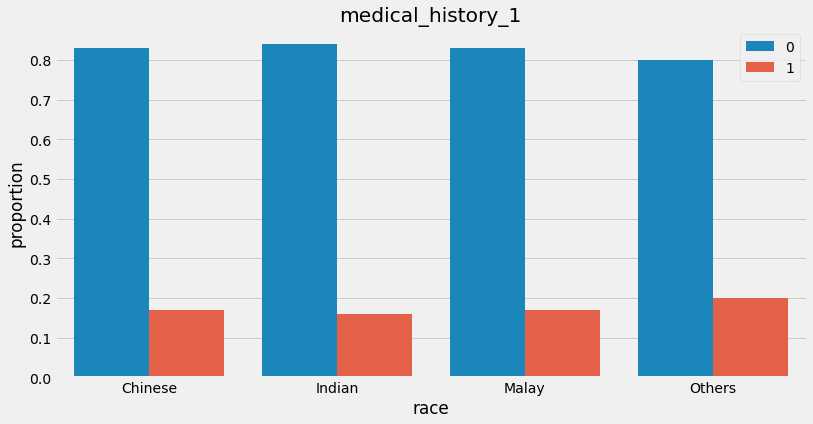

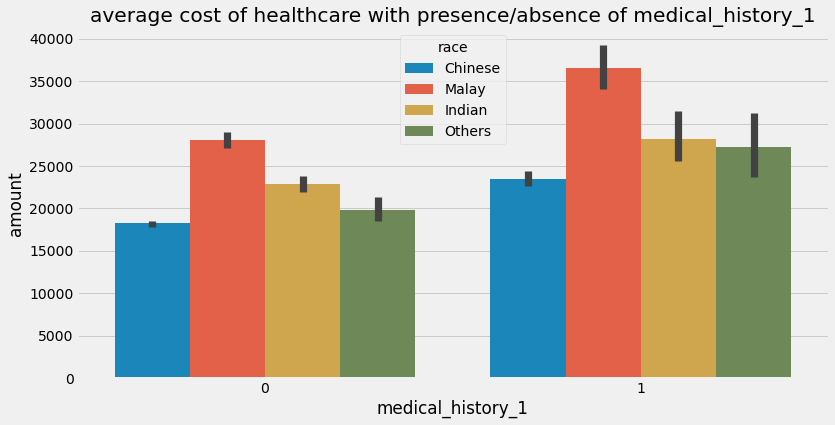

In [21]:
c = df[df['race']=='Chinese'].count()[0]
i = df[df['race']=='Indian'].count()[0]
m = df[df['race']=='Malay'].count()[0]
o = df[df['race']=='Others'].count()[0]
race_dict = {'Chinese':c, 'Malay':m,'Indian':i, 'Others':o}

temp = df.groupby(['race', 'medical_history_1']).count().reset_index()
temp2 = temp[['race','medical_history_1','amount']]
temp2 = temp2.set_index('race')
for race in set(df['race']):
    temp2.loc[race,'proportion'] = temp2.loc[race,'amount']/race_dict[race]
temp2.columns = ['medical_history_1','count','proportion']
temp2['proportion'] = np.round(temp2['proportion'],2)

temp3 = temp2.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = temp3, y='proportion', x='race', hue='medical_history_1');
plt.title('medical_history_1')
plt.legend();
plt.show();

temp = df[['medical_history_1','race','gender','resident_status','amount']]
temp.groupby(['medical_history_1','race']).mean()
plt.figure(figsize=(12,6))
sns.barplot(data=temp, x='medical_history_1', y='amount', hue='race');
plt.title(f'average cost of healthcare with presence/absence of medical_history_1');
plt.show();

From the above, no race distinctly have medical_history_1. However, it can be seen that the patients pay more when medical_history_1 is present.

#### Do patients with medical_history_1 also have symptom_5?
We analyze this below:
- from the results below, it doesnt seem many people have both medical_history_1 and symptom_5

Text(0.5, 1.0, 'num of patients with medical_')

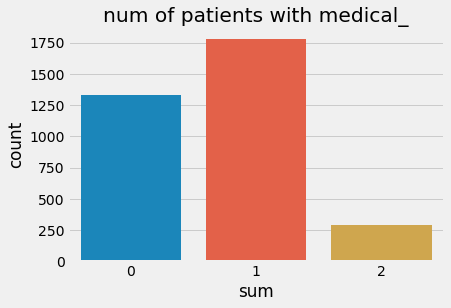

In [22]:
temp = df[['amount','race','resident_status','medical_history_1','symptom_5']]
temp['sum'] = temp['medical_history_1'] + temp['symptom_5']
temp['sum'].value_counts()
sns.countplot(data=temp, x='sum');
plt.title('num of patients with medical_')

### further anaylsis on symptoms and medical history

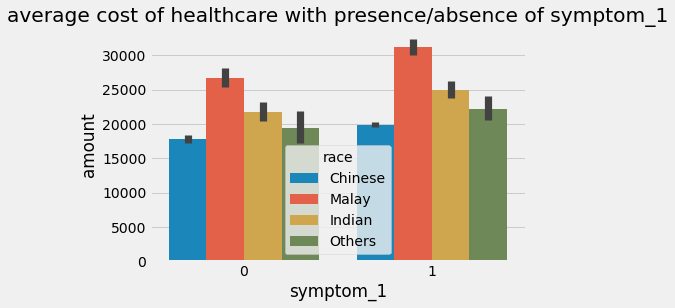

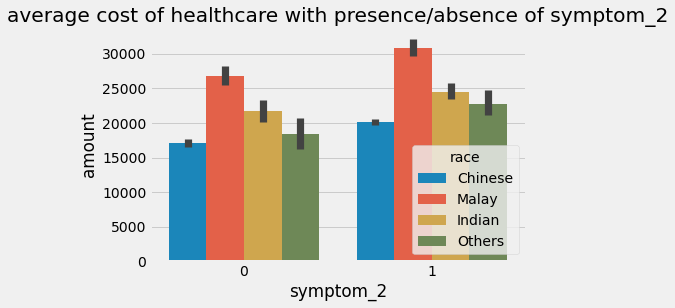

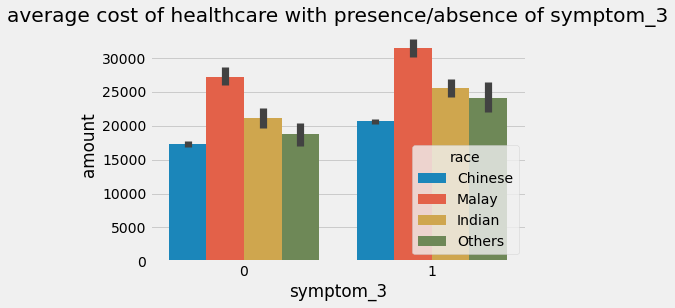

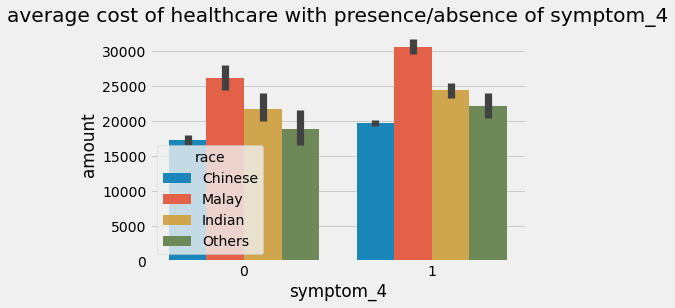

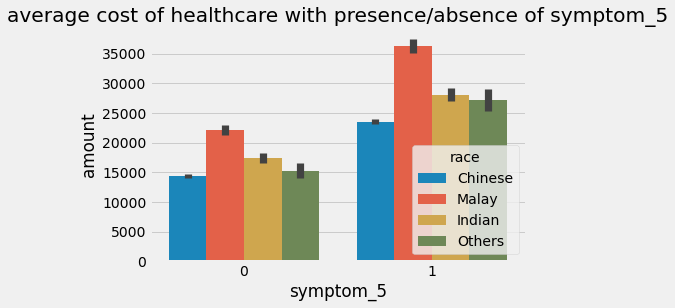

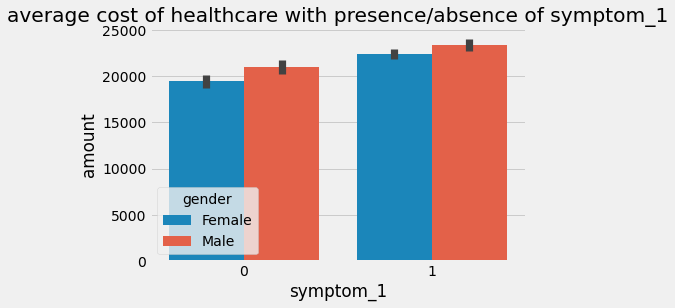

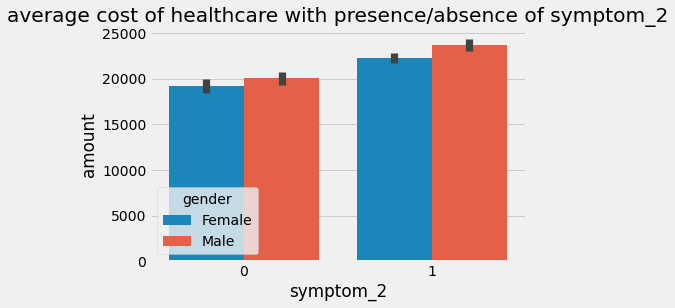

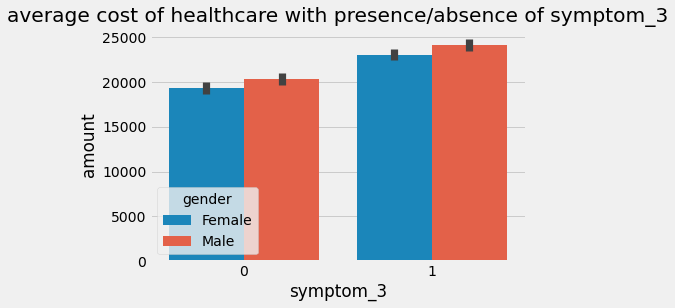

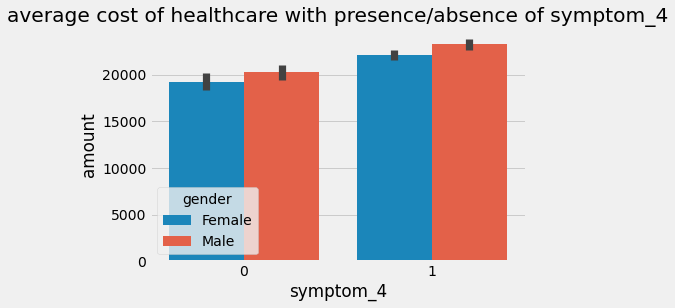

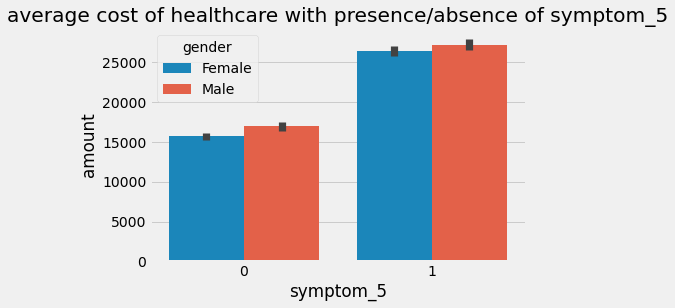

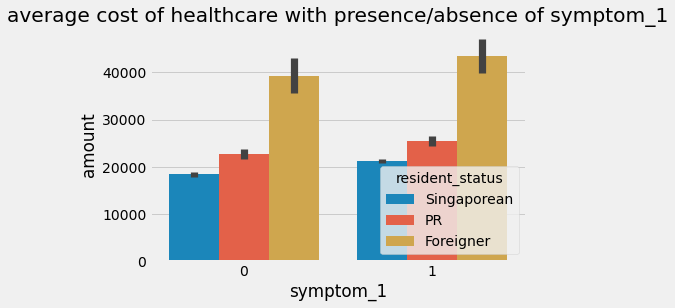

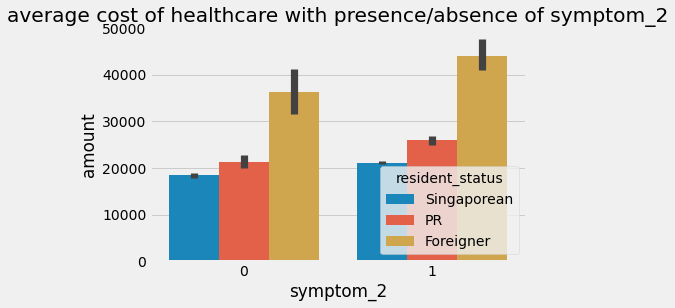

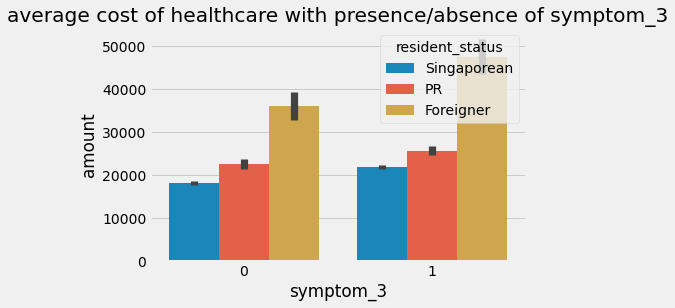

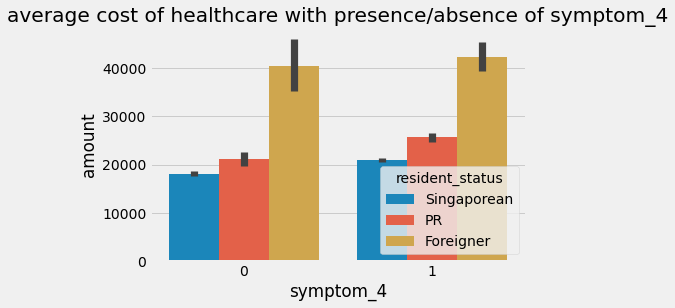

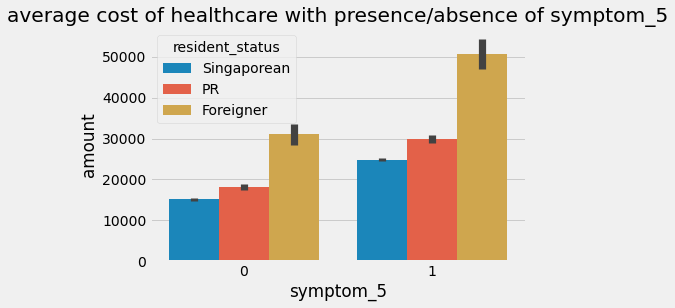

In [23]:
symptoms = ['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5']
for cat in ['race','gender','resident_status']:
    for symptom in symptoms:
        temp = df[[symptom,'race','gender','resident_status','amount']]
        temp.groupby([symptom,cat]).mean()
        sns.barplot(data=temp, x=symptom, y='amount', hue=cat);
        plt.title('average cost of healthcare with presence/absence of {}'.format(symptom))
        plt.show()

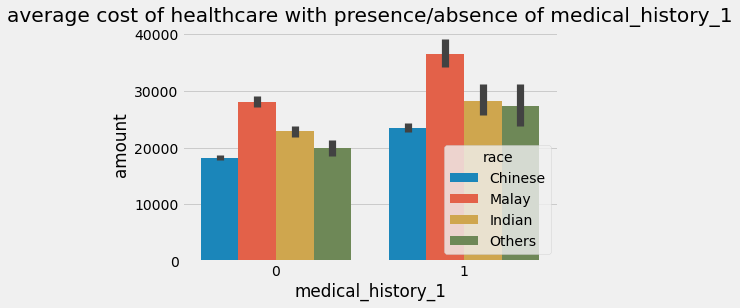

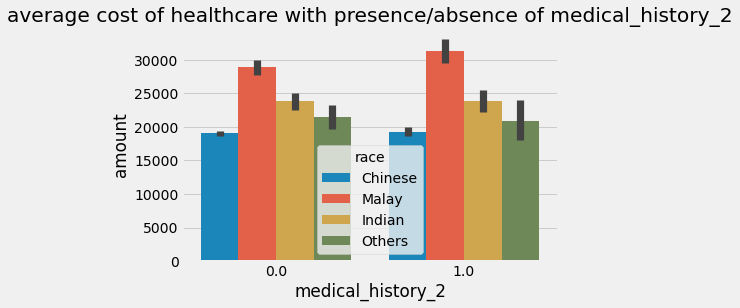

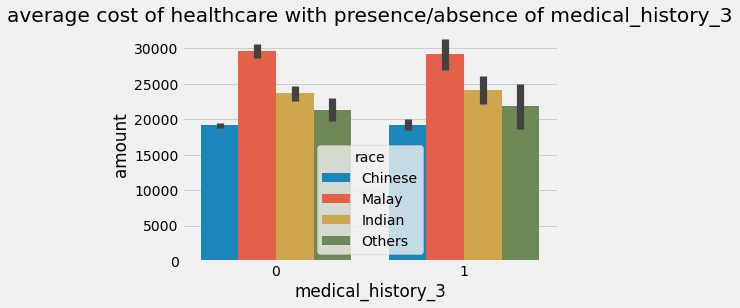

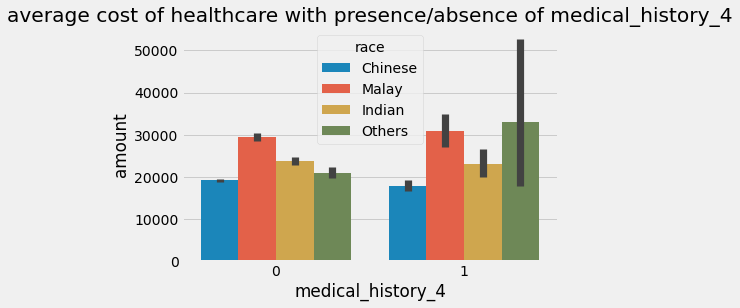

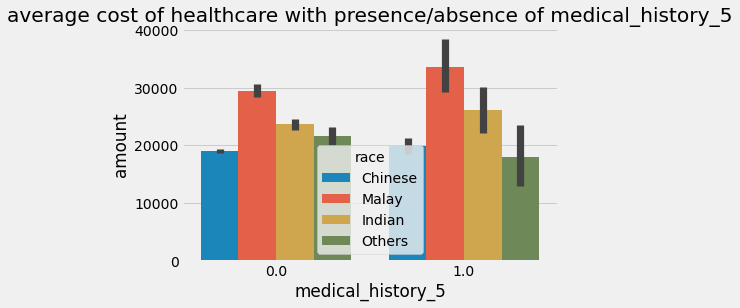

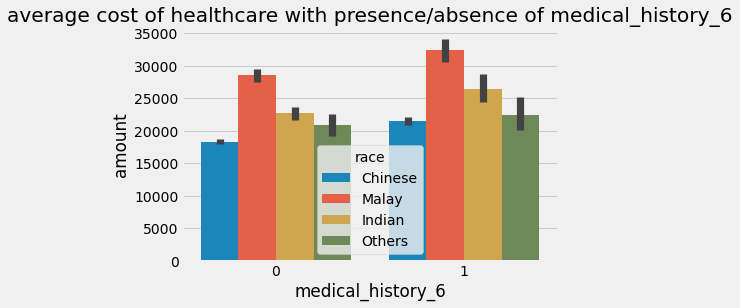

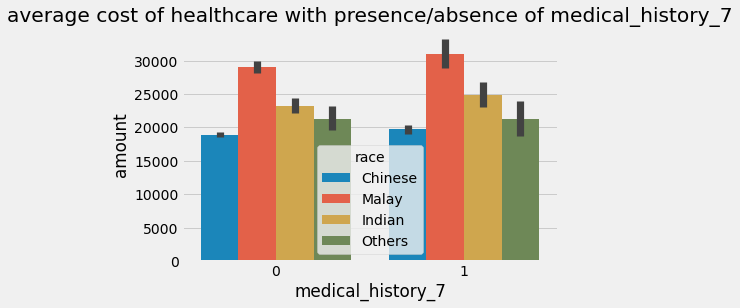

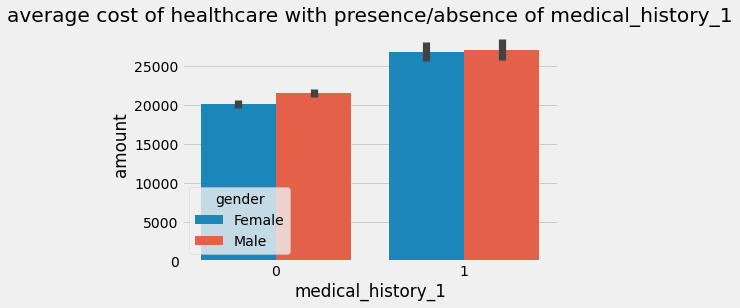

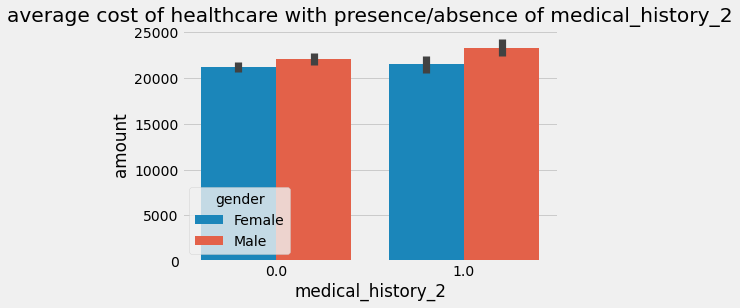

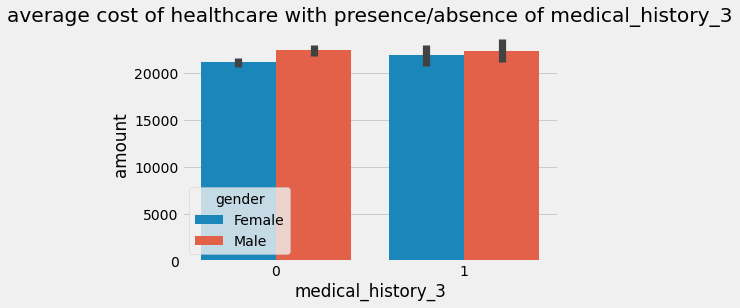

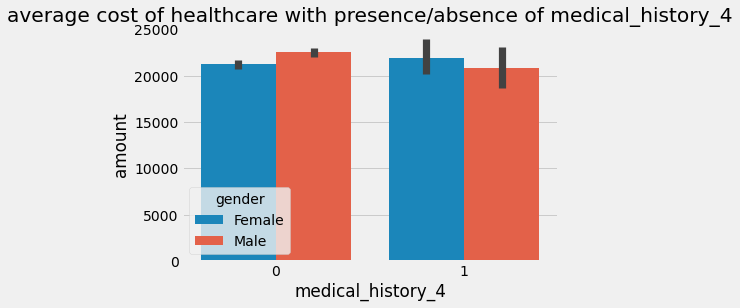

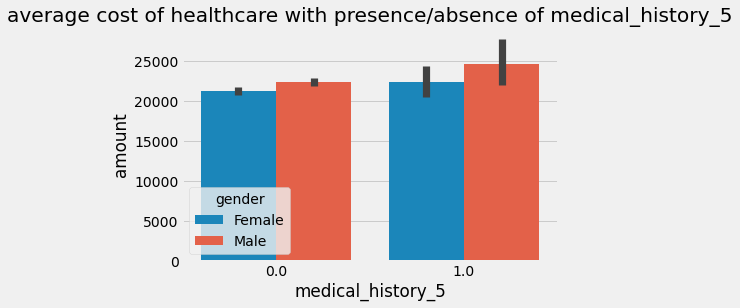

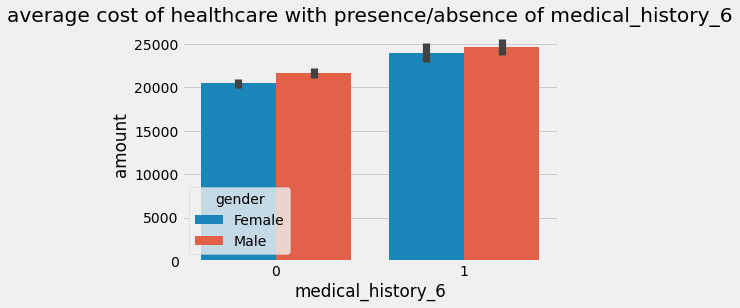

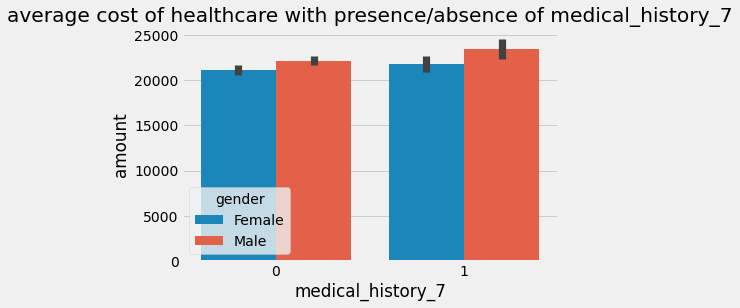

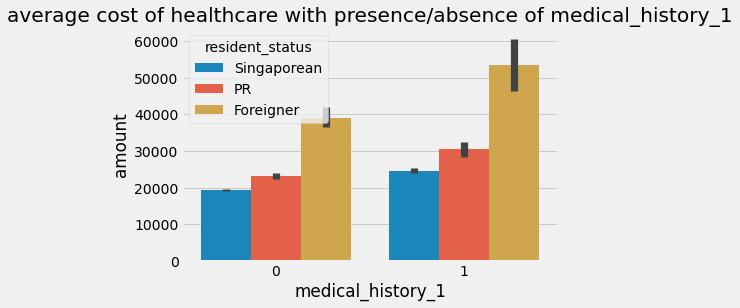

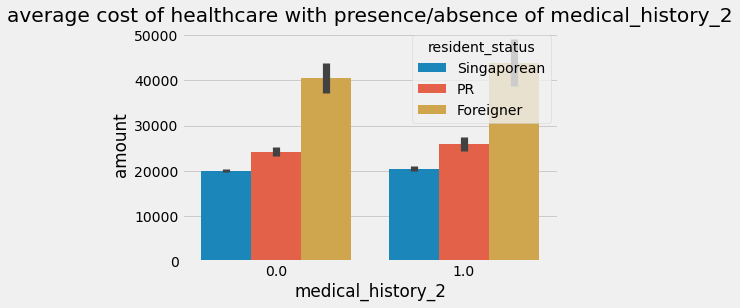

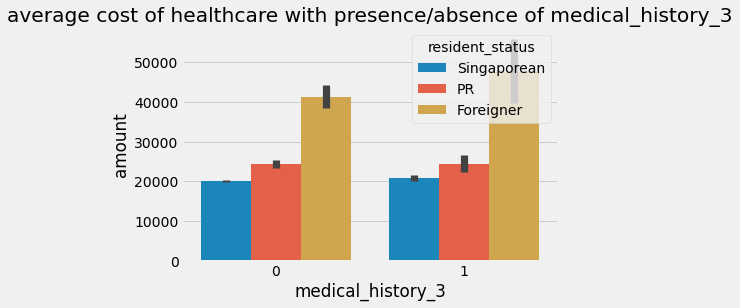

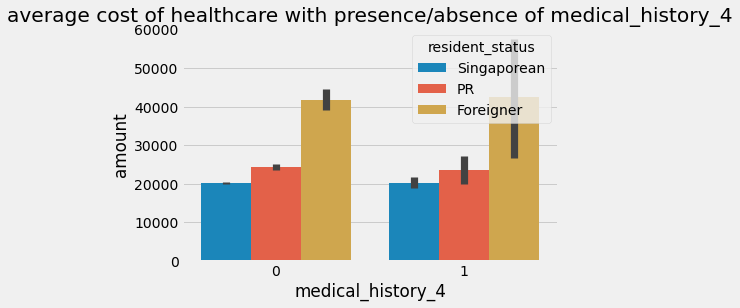

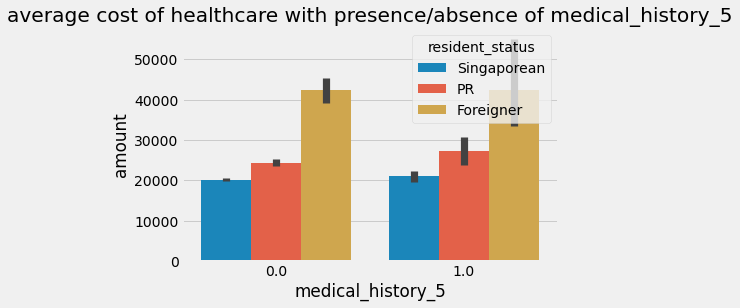

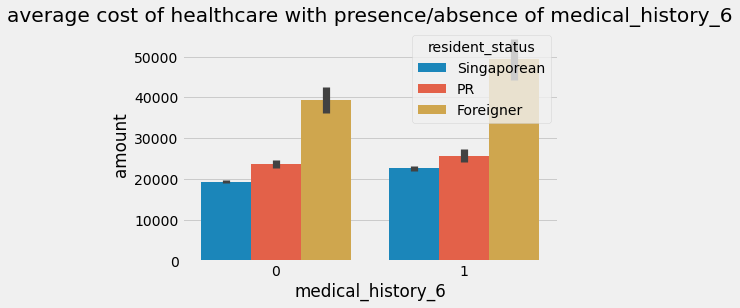

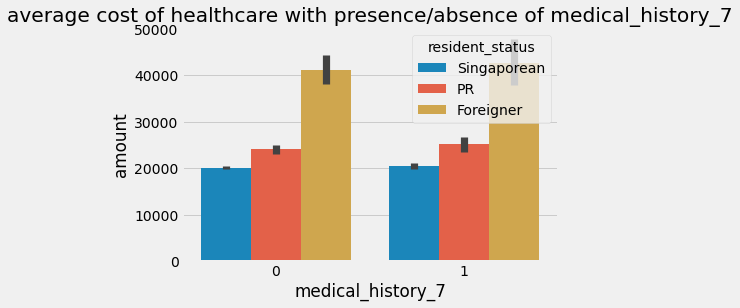

In [24]:
medicals = ['medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7']
for cat in ['race','gender','resident_status']:
    for med in medicals:
        temp = df[[med,'race','gender','resident_status','amount']]
        temp.groupby([med,cat]).mean()
        sns.barplot(data=temp, x=med, y='amount', hue=cat);
        plt.title('average cost of healthcare with presence/absence of {}'.format(med))
        plt.show()

### Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# scale numerical data first
num_list = ['weight', 'height', 'BMI','age','duration(days)','lab_result_1', 'lab_result_2', 'lab_result_3','amount']
temp = df[num_list]
ss= StandardScaler()
temp_scaled = ss.fit_transform(temp)

In [27]:
pca = PCA(n_components=5)
temp_pca = pca.fit_transform(temp_scaled)

In [28]:
pca.explained_variance_ratio_

array([0.20829523, 0.14499048, 0.13081826, 0.11604107, 0.1112816 ])

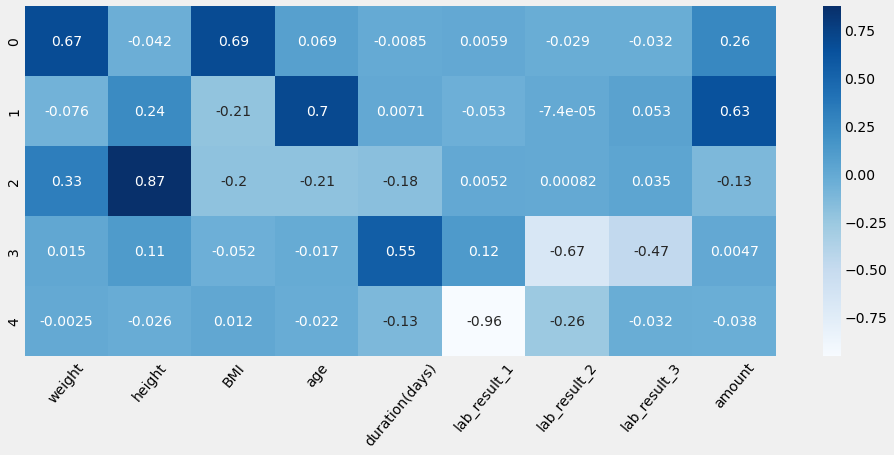

In [29]:
comps = pd.DataFrame(pca.components_, columns=num_list)
plt.figure(figsize=(15,6))
# assess how data set's variables correlate with principal components
sns.heatmap(comps, cmap="Blues", annot=True)
plt.xticks(rotation=50);

Using PCA above, the PCA variance ratio scores are not large enough for any principal component. Hence, not much information can be obtained here.